In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

In [47]:
df = pd.read_csv('df.csv')

In [48]:
df.head()

,Loyalty Number,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,9999,0,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,9999,0,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,9999,0,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,9999,0,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,9999,0,2018,10,6,2,8,3352,335.0,465,38


In [12]:


# Agrupación: Suma total de vuelos reservados por mes
df_reservas_mensuales = df.groupby('month')['flights booked'].sum().reset_index()

# Opcional: Renombrar la columna para mayor claridad
df_reservas_mensuales.columns = ['Month', 'Total_Flights_Booked']

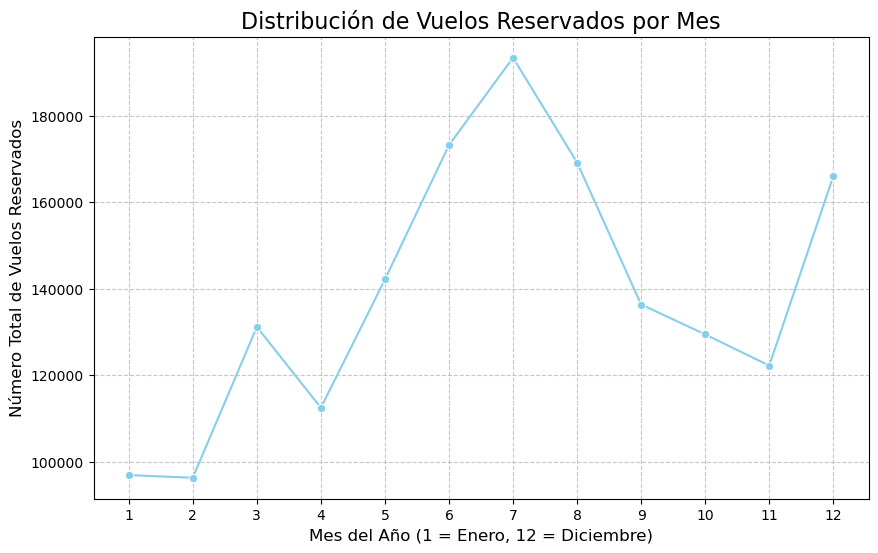

In [13]:


# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Usar un gráfico de líneas para mostrar la tendencia a lo largo del año
sns.lineplot(
    data=df_reservas_mensuales,
    x='Month',
    y='Total_Flights_Booked',
    marker='o',  # Añade puntos para cada mes
    color='skyblue'
)

# Añadir etiquetas y título
plt.title('Distribución de Vuelos Reservados por Mes', fontsize=16)
plt.xlabel('Mes del Año (1 = Enero, 12 = Diciembre)', fontsize=12)
plt.ylabel('Número Total de Vuelos Reservados', fontsize=12)

# Asegurar que los ticks del eje X sean solo números enteros de 1 a 12
plt.xticks(df_reservas_mensuales['Month']) 

# Mostrar la cuadrícula para facilitar la lectura
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

Vemos que hay una subida significativa de reservas entre abril y julio. A partir de este mes bajan, para luego volver a subir entre noviembre y diciembre, seguramente por fechas navideñas

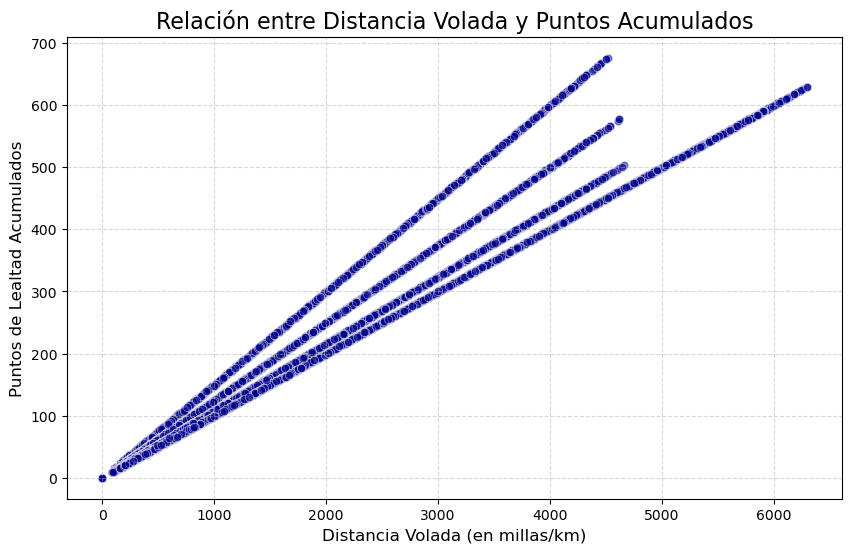

In [14]:


# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Usar un gráfico de dispersión (scatter plot)
sns.scatterplot(
    data=df,
    x='distance',
    y='points accumulated',
    alpha=0.6, # Usamos alpha para manejar el solapamiento de puntos (overplotting)
    color='darkblue'
)

# Añadir etiquetas y título
plt.title('Relación entre Distancia Volada y Puntos Acumulados', fontsize=16)
plt.xlabel('Distancia Volada (en millas/km)', fontsize=12)
plt.ylabel('Puntos de Lealtad Acumulados', fontsize=12)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()

vemos que claramente hay una relación clara entre la distancia volada y los puntos acumulados, siendo que cuantas mas millas/km se recorren, más puntos se acumulan

In [16]:
# Contar el número de clientes (registros) por cada provincia y ordenar
df_distribucion_provincia = df['province'].value_counts().reset_index()

# Renombrar las columnas
df_distribucion_provincia.columns = ['Province', 'Customer_Count']

# Ordenar de forma descendente (el valor más alto primero)
df_distribucion_provincia = df_distribucion_provincia.sort_values(
    by='Customer_Count', 
    ascending=False
)

C:\Users\maria\AppData\Local\Temp\ipykernel_29268\2550915352.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


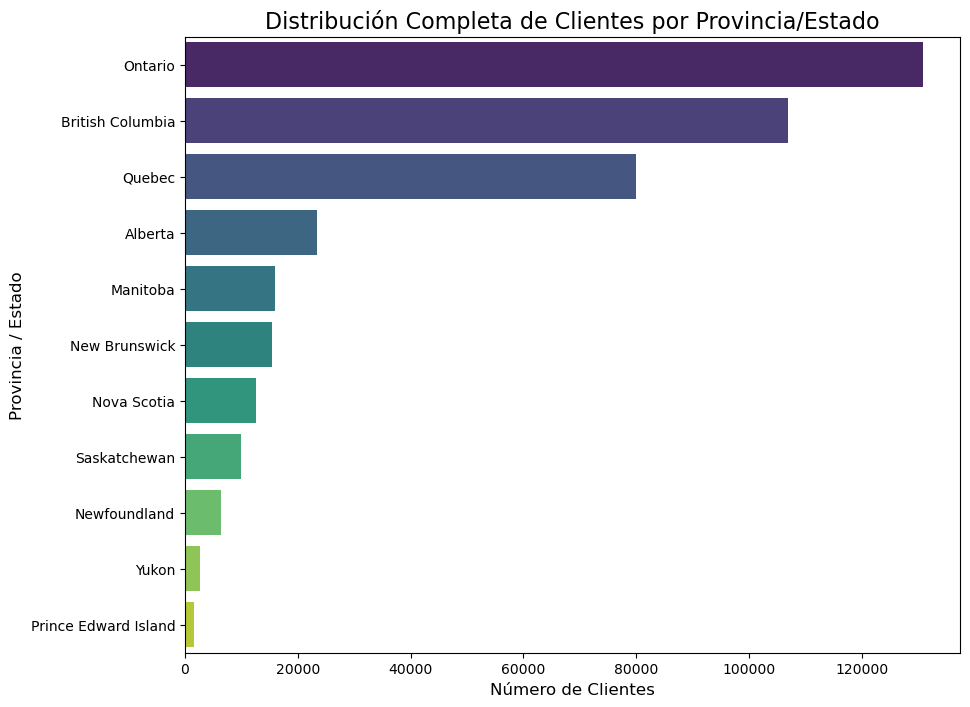

In [17]:


plt.figure(figsize=(10, 8)) # Ajustamos el tamaño para acomodar todas las barras

# Crear el gráfico de barras horizontal
# Usamos 'order' para asegurar que las barras sigan el orden descendente de Customer_Count
sns.barplot(
    data=df_distribucion_provincia,
    x='Customer_Count',
    y='Province',
    palette='viridis',
    order=df_distribucion_provincia['Province']
)

# Añadir etiquetas y título
plt.title('Distribución Completa de Clientes por Provincia/Estado', fontsize=16)
plt.xlabel('Número de Clientes', fontsize=12)
plt.ylabel('Provincia / Estado', fontsize=12)

# Mostrar el gráfico
plt.show()

Aqui vemos que el mayor numero de clientes se encuentran en Ontario, mientras que el menor se encuentra en PrinceEdward Island. Esto se puede relacionar tambien con la densidad de poblacion de las provincias, ya que las que menos clientes tienen son zonas conocidas por una densidad de poblacion escasa, mientras que en las provincias que  mas tienen, se concentran la mayor parte de los habitantes de Canadá

In [21]:
orden_educacion = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

C:\Users\maria\AppData\Local\Temp\ipykernel_29268\2551788057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='education', ylabel='salary'>

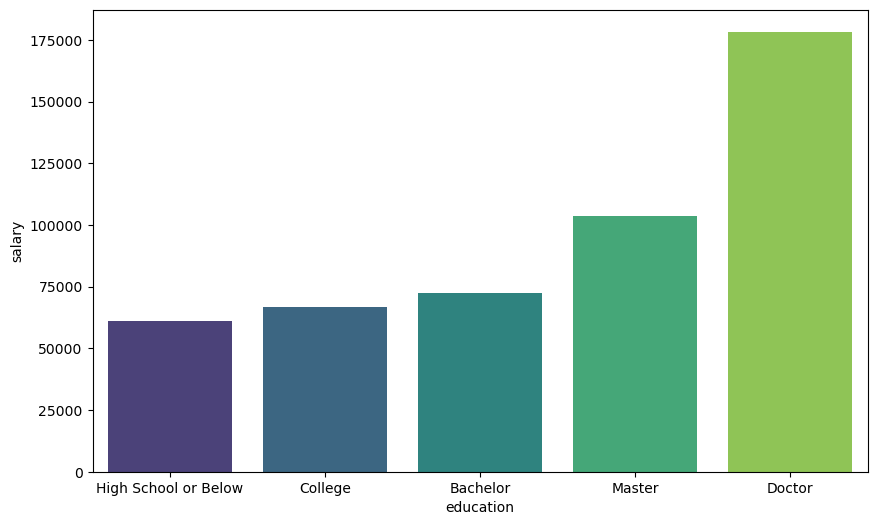

In [22]:
# Calcular el salario promedio por educación
df_salario_promedio = df.groupby('education')['salary'].mean().reindex(orden_educacion).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_salario_promedio,
    x='education',
    y='salary',
    palette='viridis'
)
# ... (añadir títulos y etiquetas) ...

Cuanto  mayor es el nivel educativo del cliente, mayor es el ingreso

In [23]:
# Contar la frecuencia de cada tipo de tarjeta de fidelidad
df_proporcion_tarjetas = df['loyalty card'].value_counts().reset_index()

# Renombrar las columnas
df_proporcion_tarjetas.columns = ['Loyalty_Card_Type', 'Customer_Count']

# Opcional: Calcular el porcentaje para las etiquetas
total_clientes = df_proporcion_tarjetas['Customer_Count'].sum()
df_proporcion_tarjetas['Percentage'] = (df_proporcion_tarjetas['Customer_Count'] / total_clientes) * 100

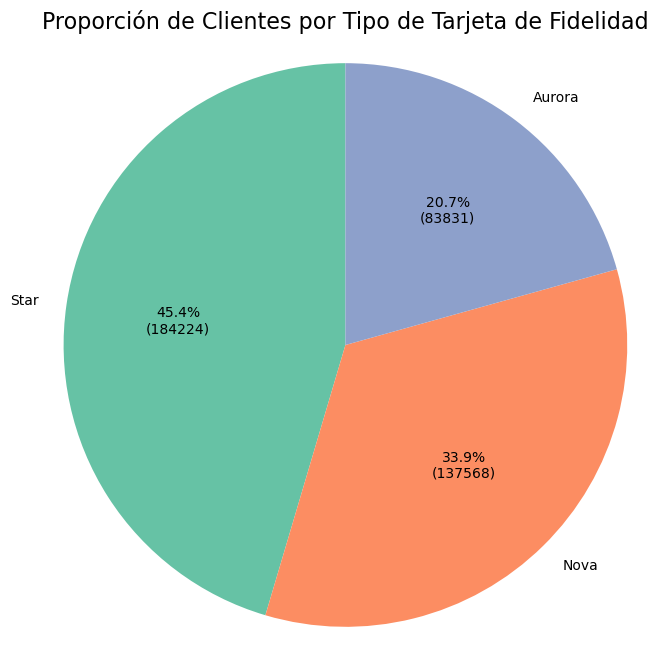

In [24]:

# Definir los datos para el gráfico de tarta
sizes = df_proporcion_tarjetas['Customer_Count']
labels = df_proporcion_tarjetas['Loyalty_Card_Type']

# Crear etiquetas con el porcentaje (formato de 1 decimal)
def make_autopct(values):
    def my_autopct(pct):
        # pct es el porcentaje calculado por Matplotlib
        absolute = int(pct/100.*total_clientes)
        return f"{pct:.1f}%\n({absolute})"
    return my_autopct

plt.figure(figsize=(8, 8))

# Crear el Gráfico de Tarta
plt.pie(
    sizes,
    labels=labels,
    autopct=make_autopct(sizes), # Formato personalizado para mostrar % y conteo
    startangle=90, # Iniciar el primer sector desde arriba
    colors=plt.cm.Set2.colors # Usar una paleta de colores
)

# Añadir título
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad', fontsize=16)

# Asegurar que el gráfico sea un círculo
plt.axis('equal') 

# Mostrar el gráfico
plt.show()

la mayor parte de las tarjetas son del tipo Star. No hay una diferencia extrema entre los tipo de tarjetas

In [25]:
# Contar la frecuencia de clientes por la combinación de las dos categorías
df_distribucion_segmentada = df.groupby(['marital status', 'gender']).size().reset_index(name='Customer_Count')

# Opcional: Reordenar las categorías para mejor visualización si es necesario
# Por ejemplo, puedes definir el orden de Marital Status si es necesario

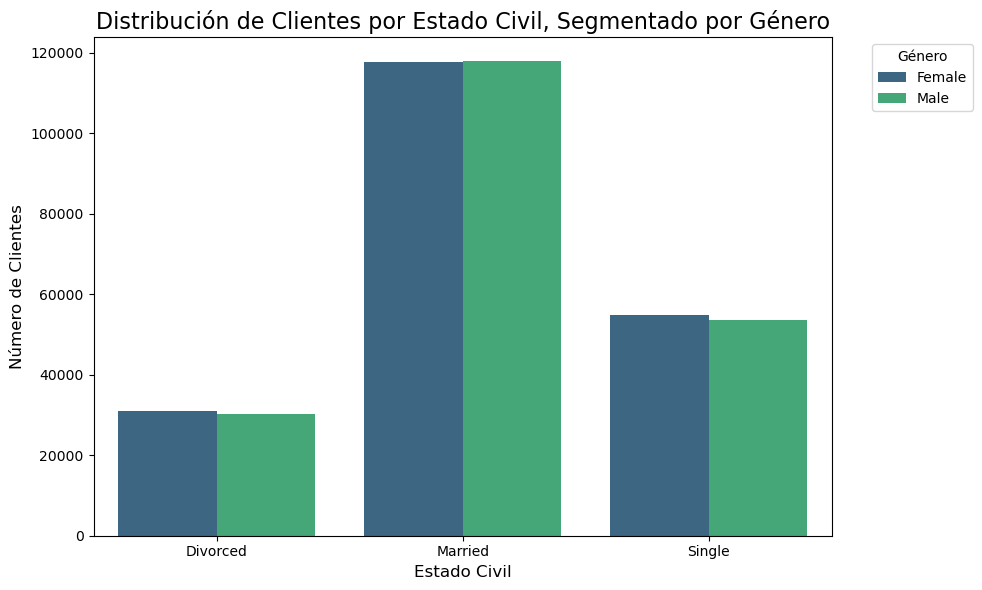

In [26]:


plt.figure(figsize=(10, 6))

# Crear el gráfico de barras agrupado
sns.barplot(
    data=df_distribucion_segmentada,
    x='marital status',
    y='Customer_Count',
    hue='gender', # Clave para la agrupación (color)
    palette='viridis' 
)

# Añadir etiquetas y título
plt.title('Distribución de Clientes por Estado Civil, Segmentado por Género', fontsize=16)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Colocar la leyenda fuera del gráfico
plt.legend(title='Género', loc='upper right', bbox_to_anchor=(1.2, 1))

# Rotar las etiquetas del eje X si son largas
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

en genral, no hay mucha diferencia entre mujeres y hombres, sin embargo, si que se obseerva que la mayoria de los clientes estan casados.

In [27]:
#aqui lo que queremos ver es si el tipo de tarjeta está relacionado con el salario del cliente
# Define un orden lógico para las tarjetas si es conocido (ej. de menor a mayor nivel/beneficio)
orden_tarjetas = df['loyalty card'].unique() 
# Si el orden importa (ej. Standard, Silver, Gold), defínelo explícitamente:
# orden_tarjetas = ['Standard', 'Silver', 'Gold', 'Platinum'] 

# Si tienes la columna 'salary' en minúsculas y limpia, ya puedes graficar.

C:\Users\maria\AppData\Local\Temp\ipykernel_29268\4153202518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


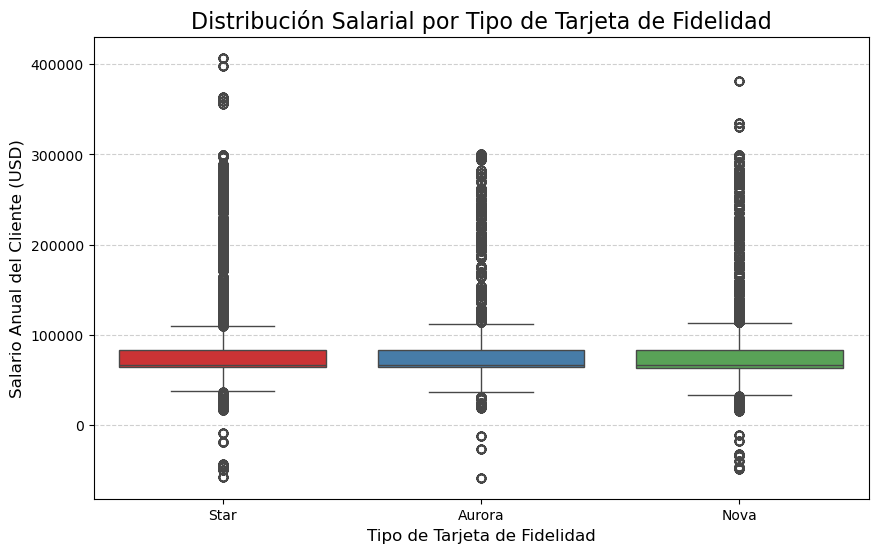

In [28]:
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear el Diagrama de Caja (Boxplot)
sns.boxplot(
    data=df,
    x='loyalty card',
    y='salary',
    order=orden_tarjetas, # Usa el orden si lo definiste
    palette='Set1'
)

# Añadir etiquetas y título
plt.title('Distribución Salarial por Tipo de Tarjeta de Fidelidad', fontsize=16)
plt.xlabel('Tipo de Tarjeta de Fidelidad', fontsize=12)
plt.ylabel('Salario Anual del Cliente (USD)', fontsize=12)

# Mostrar la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()

In [29]:
print("\nMediana de Salario por Tipo de Tarjeta (confirmación numérica):")
df_mediana_tarjeta = df.groupby('loyalty card')['salary'].median().sort_values(ascending=False)
print(df_mediana_tarjeta)


Mediana de Salario por Tipo de Tarjeta (confirmación numérica):
loyalty card
Aurora    66731.38
Nova      66731.38
Star      66731.38
Name: salary, dtype: float64


In [37]:
# 1. Crear una tabla cruzada de conteos (frecuencias)
df_crosstab_conteo = pd.crosstab(df['education'], df['loyalty card'])

# 2. Normalizar la tabla para que las filas sumen 1 (100%). 
# Esto nos da la proporción de tipos de tarjeta DENTRO de cada nivel educativo.
df_crosstab_prop = df_crosstab_conteo.div(df_crosstab_conteo.sum(axis=1), axis=0)

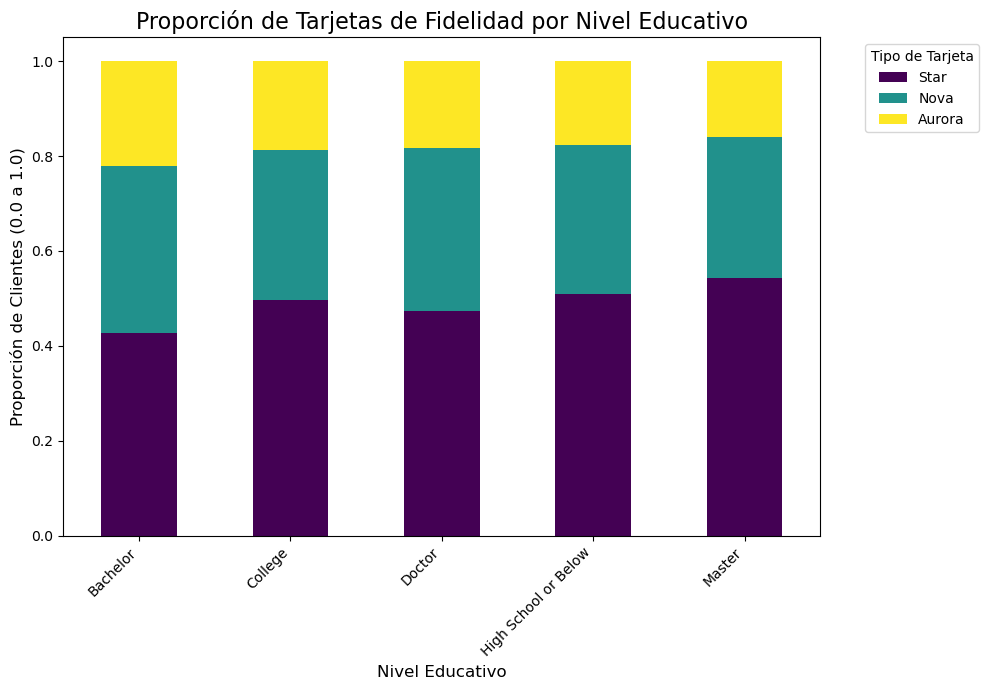

In [39]:
# Definir el orden de las columnas (tipos de tarjeta) para el gráfico apilado
columnas_ordenadas = ['Star', 'Nova', 'Aurora'] # Ajusta si tienes más niveles como 'Platinum'

# Crear la figura y los ejes
plt.figure(figsize=(10, 7))

# Crear el gráfico de barras apiladas
df_crosstab_prop[columnas_ordenadas].plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

# Añadir etiquetas y título
plt.title('Proporción de Tarjetas de Fidelidad por Nivel Educativo', fontsize=16)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Proporción de Clientes (0.0 a 1.0)', fontsize=12)

# Colocar la leyenda fuera del gráfico
plt.legend(title='Tipo de Tarjeta', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotar las etiquetas del eje X para mejor lectura
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

por lo general, estan bastante repartidos, por lo que no se ve que haya una preferencia de categoria por nivel adquisitivo

In [40]:
# 1. Agrupar por provincia y sumar el total de vuelos reservados
df_vuelos_por_provincia = df.groupby('province')['flights booked'].sum().reset_index()

# 2. Renombrar y ordenar de mayor a menor tendencia a viajar
df_vuelos_por_provincia.columns = ['Province', 'Total_Flights_Booked']

df_vuelos_por_provincia = df_vuelos_por_provincia.sort_values(
    by='Total_Flights_Booked', 
    ascending=False
)

C:\Users\maria\AppData\Local\Temp\ipykernel_29268\3755994510.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


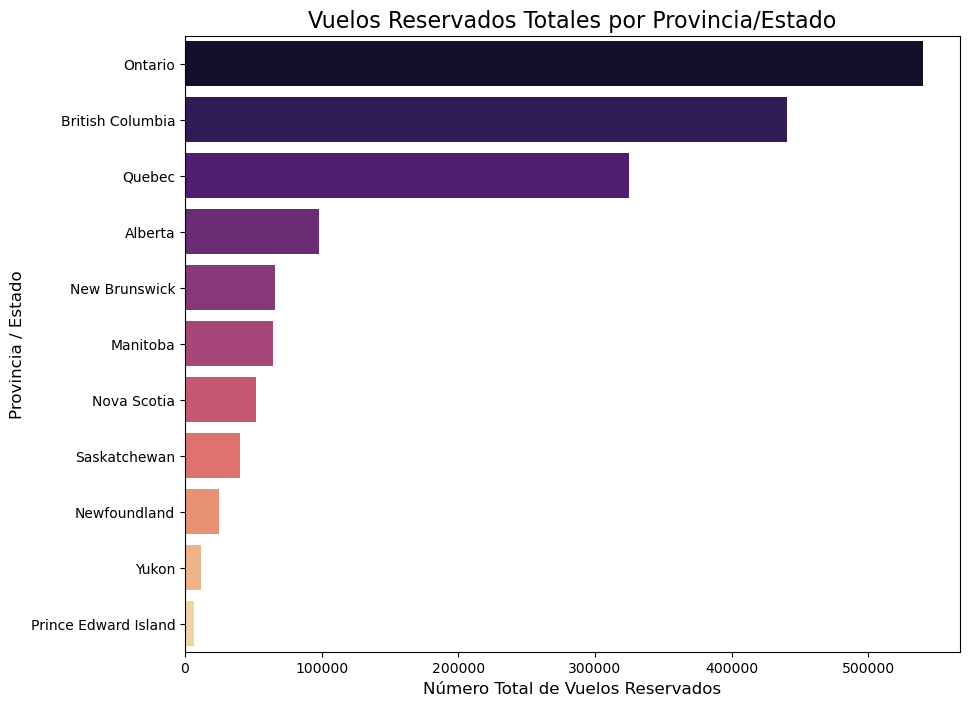

In [41]:
# Crear la figura
plt.figure(figsize=(10, 8))

# Crear el Gráfico de Barras Horizontal
sns.barplot(
    data=df_vuelos_por_provincia,
    x='Total_Flights_Booked',
    y='Province',
    palette='magma', # Una nueva paleta de colores
    order=df_vuelos_por_provincia['Province'] # Asegura el orden descendente
)

# Añadir etiquetas y título
plt.title('Vuelos Reservados Totales por Provincia/Estado', fontsize=16)
plt.xlabel('Número Total de Vuelos Reservados', fontsize=12)
plt.ylabel('Provincia / Estado', fontsize=12)

# Mostrar el gráfico
plt.show()

Ontario sigue siendo la Provincia que mas vuelos reserva

In [42]:
# 1. Agrupar por provincia y sumar la distancia total volada
df_distancia_por_provincia = df.groupby('province')['distance'].sum().reset_index()

# 2. Renombrar y ordenar de mayor a menor distancia
df_distancia_por_provincia.columns = ['Province', 'Total_Distance_Flown']

df_distancia_por_provincia = df_distancia_por_provincia.sort_values(
    by='Total_Distance_Flown', 
    ascending=False
)

C:\Users\maria\AppData\Local\Temp\ipykernel_29268\22983393.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


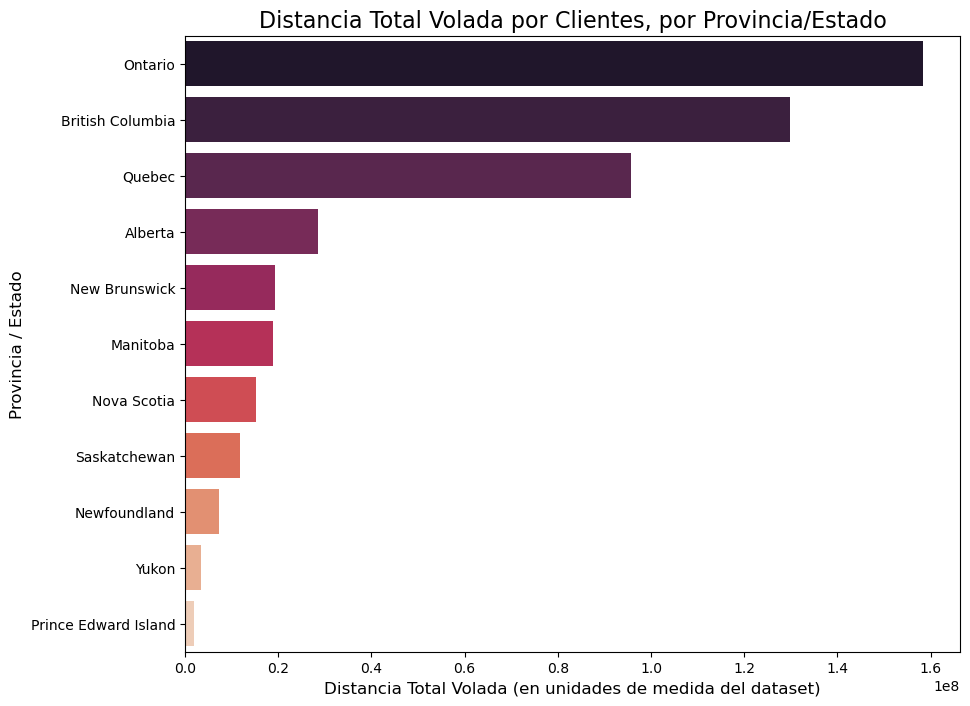

In [43]:
# Crear la figura
plt.figure(figsize=(10, 8))

# Crear el Gráfico de Barras Horizontal
sns.barplot(
    data=df_distancia_por_provincia,
    x='Total_Distance_Flown',
    y='Province',
    palette='rocket', # Una nueva paleta de colores
    order=df_distancia_por_provincia['Province'] # Asegura el orden descendente
)

# Añadir etiquetas y título
plt.title('Distancia Total Volada por Clientes, por Provincia/Estado', fontsize=16)
plt.xlabel('Distancia Total Volada (en unidades de medida del dataset)', fontsize=12)
plt.ylabel('Provincia / Estado', fontsize=12)

# Mostrar el gráfico
plt.show()

por lo que vemos, en terminos generales, los de ontario son lo mas todo

In [51]:
# Columnas de interés: Identificador de cliente, mes, y la métrica acumulada
columnas_seleccionadas = ['loyalty number', 'month', 'total flights']

# Agrupar por Cliente y Mes, y seleccionar la columna 'total flights'.
# Usamos first() o max() ya que el valor de 'total flights' debe ser el mismo 
# dentro de cada grupo (Cliente, Mes).
df_vuelos_acumulados_mensuales = df.groupby(['Loyalty Number', 'month'])[
    'total flights'
].first().reset_index()

# Opcional: Ordenar por cliente y luego por mes para facilitar la lectura de la serie temporal
df_vuelos_acumulados_mensuales = df_vuelos_acumulados_mensuales.sort_values(
    by=['Loyalty Number', 'month']
)

print("✅ DataFrame creado con el total de vuelos acumulados por cliente y mes.")
print("\nEjemplo de Evolución del Vuelo Acumulado para los primeros clientes:")
print(df_vuelos_acumulados_mensuales.head(10))

✅ DataFrame creado con el total de vuelos acumulados por cliente y mes.

Ejemplo de Evolución del Vuelo Acumulado para los primeros clientes:
   Loyalty Number  month  total flights
0          100018      1              3
1          100018      2              4
2          100018      3             17
3          100018      4              4
4          100018      5              0
5          100018      6              5
6          100018      7             10
7          100018      8             15
8          100018      9             13
9          100018     10             10


<Axes: xlabel='salary'>

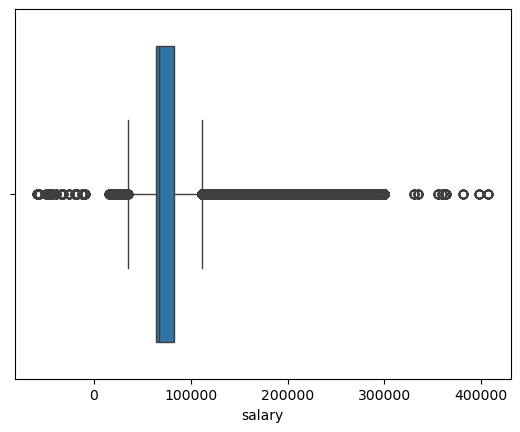

In [52]:
sns.boxplot(data=df, x='salary')